# Pytorch dataloaders for echocardiography

Miguel Xochicale [@mxochicale](https://github.com/mxochicale)  
Dec 2021


## Introduction
This notebook presents prototypes to pre-process echocardiography datasets with the use of pytorch features. 

## Running notebook

1. Go to echocardiography repository path: `$HOME/repositories/echocardiography/`
2. Open echocardiography repo in pycharm and in the terminal type:
    ```
    git checkout master # or the branch
    git pull # to bring a local branch up-to-date with its remote version
    ```
3. Launch Notebook server
    Go to you repository path: `cd $HOME/repositories/echocardiography/scripts/dataloaders` and type in the pycharm terminal:
    ```
    conda activate rt-ai-echo-VE 
    jupyter notebook
    ```
    which will open your web-browser.
    
    
## References
* NVIDIA Data Loading Library (DALI): https://github.com/NVIDIA/DALI/tree/main/docs/examples/sequence_processing Added: Mon 13 Dec 09:22:05 GMT 2021



## Jupyter Notebook

### Setting imports and datasets paths

In [1]:
import os
import sys
import argparse
import yaml
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from torch.utils.data import DataLoader
from torchvision import transforms, utils

from source.dataloaders.EchocardiographicVideoDataset import ViewVideoDataset

HOME_PATH = os.path.expanduser(f'~')
CONFIG_FILES_PATH= 'repositories/echocardiography/scripts/config_files'
YML_FILE = os.path.join(HOME_PATH, CONFIG_FILES_PATH, 'config_4cv.yml')

with open(YML_FILE, 'r') as yml:
    config = yaml.load(yml, Loader=yaml.FullLoader)

### Setting variables and loading datasets using pytorch dataloader

In [2]:
# ToPILImage() -> Resize() -> ToTensor() # https://discuss.pytorch.org/t/typeerror-img-should-be-pil-image-got-class-torch-tensor-conversion-from-torch-tensor-to-pil-image/30494/4
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
    #transforms.RandomSizedCrop(224),
#   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


dataset = ViewVideoDataset(
    config['participant_videos_path'], 
    config['participant_path_json_files'], 
    transform=None 
    )


video_index_S0 = 0
data_S0 = dataset[video_index_S0]

video_index_S1 = 1
data_S1 = dataset[video_index_S1]

video_index_S2 = 2
data_S2 = dataset[video_index_S2]


  
  
  video_name=/home/mx19/datasets/vital-us/echocardiography/videos-echo/01NVb-003-072/T1/01NVb-003-072-1-echo.mp4
  Frame_height=1080, frame_width=1920 fps=30 nframes=23285 
  jsonfile_name=/home/mx19/repositories/echocardiography/data/labelling/json_files/4CV/01NVb_003_072/01NVb_003_072_T1_4CV.json
  number_of_labelled_clips=1
  
  


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23285/23285 [00:56<00:00, 414.14it/s]


Function '__getitem__' executed in 56.4939s
  
  
  video_name=/home/mx19/datasets/vital-us/echocardiography/videos-echo/01NVb-003-072/T2/01NVb-003-072-2-echo-cont.mp4
  Frame_height=1080, frame_width=1920 fps=30 nframes=20130 
  jsonfile_name=/home/mx19/repositories/echocardiography/data/labelling/json_files/4CV/01NVb_003_072/01NVb_003_072_T2_4CV.json
  number_of_labelled_clips=3
  
  


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20130/20130 [00:47<00:00, 425.41it/s]


Function '__getitem__' executed in 47.6491s
  
  
  video_name=/home/mx19/datasets/vital-us/echocardiography/videos-echo/01NVb-003-072/T3/01NVb-003-072-3-echo.mp4
  Frame_height=1080, frame_width=1920 fps=30 nframes=23225 
  jsonfile_name=/home/mx19/repositories/echocardiography/data/labelling/json_files/4CV/01NVb_003_072/01NVb_003_072_T3_4CV.json
  number_of_labelled_clips=2
  
  


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23225/23225 [00:52<00:00, 440.09it/s]


Function '__getitem__' executed in 52.9180s


### Using dataloader with pre-processing image techniques

 <class 'torch.Tensor'>, torch.Size([359, 3, 1080, 1920]) 
 Number of batches: 90 
       batch_index: 0 batch_size: torch.Size([4, 3, 1080, 1920])
       batch_index: 1 batch_size: torch.Size([4, 3, 1080, 1920])
       batch_index: 2 batch_size: torch.Size([4, 3, 1080, 1920])
       batch_index: 3 batch_size: torch.Size([4, 3, 1080, 1920])
torch.Size([3, 1084, 7690])


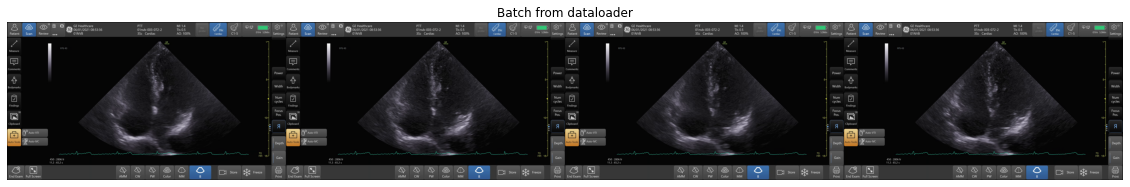

In [3]:
print(f' {type(data_S1)}, {data_S1.size()} ')
# AG recommends to use one dataloader for multiple subjects

dataloader = DataLoader(data_S1,
                    batch_size=4,
                    shuffle=False,
                    num_workers=0,
                    pin_memory=True
                    )
length_of_dl=len(dataloader)
print(f' Number of batches: {length_of_dl} ')


for i_batch, sample_batched in enumerate(dataloader):
    print(f'       batch_index: {i_batch} batch_size: {sample_batched.size()}'  )

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure(figsize =(20,5) )
        
        batch_size = len(sample_batched)
        im_size_H, im_size_W = sample_batched.size(2), sample_batched.size(3)
        
        plt.tight_layout()
        grid = utils.make_grid(sample_batched)
        gridT = grid.numpy().transpose((1, 2, 0))
        print(grid.size())
        plt.imshow(gridT)
        plt.title('Batch from dataloader')
        plt.axis('off')
        plt.ioff()
        plt.show()
        break



#print(f' {type(data_S1)}, {data_S1.size()} ')
#print(f' {type(data_S2)}, {data_S2.size()} ')